In [30]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from random import randrange

In [12]:
img_ = cv2.imread('right.jpeg')
img1 = cv2.cvtColor(img_,cv2.COLOR_BGR2GRAY)
img = cv2.imread('left.jpeg')
img2 = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

In [13]:
sift = cv2.xfeatures2d.SIFT_create()
# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)

In [14]:
bf = cv2.BFMatcher()
matches = bf.knnMatch(des1,des2, k=2)

In [15]:
# Apply ratio test
good = []
for m in matches:
    if m[0].distance < 0.5*m[1].distance:
        good.append(m)
        matches = np.asarray(good)

(-0.5, 999.5, 665.5, -0.5)

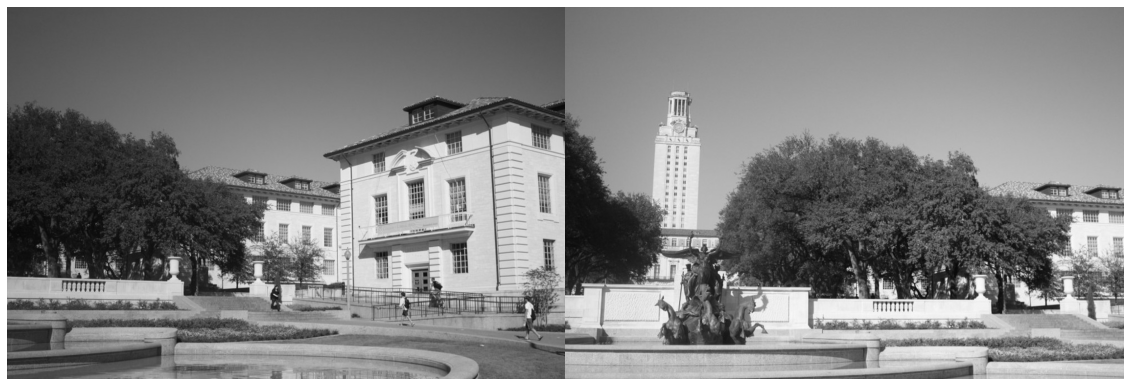

In [16]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))
fig.subplots_adjust(wspace=0.0)
ax1.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
ax1.axis('off')
ax2.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
ax2.axis('off')

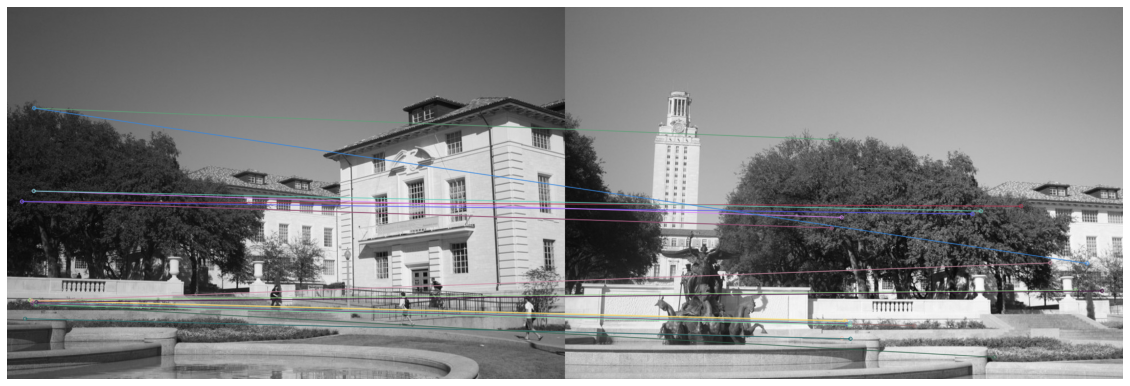

In [17]:
img3 = cv2.drawMatchesKnn(img1,kp1,img2,kp2,good[:10],None,flags=2)
plt.figure(figsize=(20,10))
plt.axis('off')
plt.imshow(img3)

In [18]:
if len(matches[:,0]) >= 4:
    src = np.float32([ kp1[m.queryIdx].pt for m in matches[:,0] ]).reshape(-1,1,2)
    dst = np.float32([ kp2[m.trainIdx].pt for m in matches[:,0] ]).reshape(-1,1,2)
    H, masked = cv2.findHomography(src, dst, cv2.RANSAC, 5.0)
#print H
else:
    raise AssertionError("Can’t find enough keypoints.")

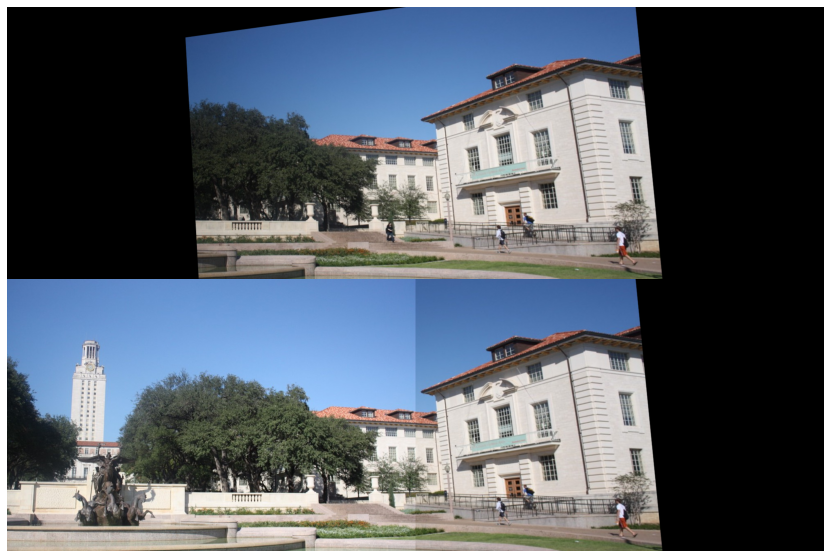

In [29]:
dst = cv2.warpPerspective(img_,H,(img.shape[1] + img_.shape[1], img.shape[0]))
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 10))
fig.subplots_adjust(hspace=0.0)
#ax1.title("Warped Image")
ax1.axis('off')
ax1.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))
dst[0:img.shape[0], 0:img.shape[1]] = img
cv2.imwrite("output.jpg",dst)
ax2.axis('off')
ax2.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))


